In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# CSVファイルを読み込む
csv_file = './image_evaluation_results.csv'  # CSVファイルのパスを指定
df = pd.read_csv(csv_file)

# 必要な列を取得
overall_score = df.iloc[:, 1]  # 1列目 (overall_score)
predicted_score = df.iloc[:, 2]  # 2列目 (predicted_score)



In [3]:
#ピアソンの線形相関係数
pearson_corr, pearson_p_value = pearsonr(overall_score, predicted_score)
print(f"ピアソンの線形相関係数: {pearson_corr}, p値: {pearson_p_value:.10f}")

# スピアマンの順位相関係数
spearman_corr, spearman_p_value = spearmanr(overall_score, predicted_score)
print(f"スピアマンの順位相関係数: {spearman_corr}, p値: {spearman_p_value:.10f}")

# ケンドールの順位相関係数
kendall_corr, kendall_p_value = kendalltau(overall_score, predicted_score)
print(f"ケンドールの順位相関係数: {kendall_corr}, p値: {kendall_p_value:.10f}")

ピアソンの線形相関係数: 0.2606728861801205, p値: 0.0000000000
スピアマンの順位相関係数: 0.24137146563380932, p値: 0.0000000000
ケンドールの順位相関係数: 0.17434205767452618, p値: 0.0000000000


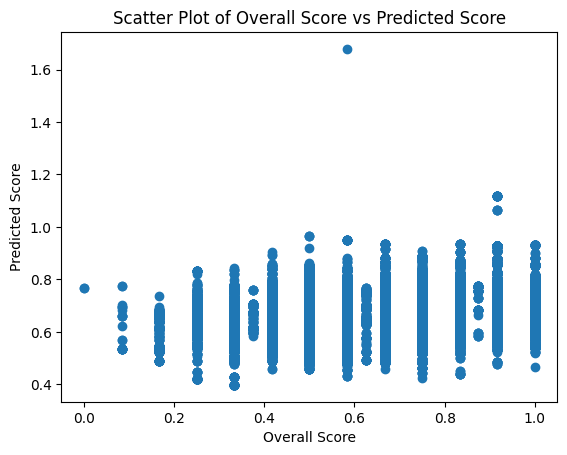

In [4]:
import matplotlib.pyplot as plt

plt.scatter(overall_score, predicted_score)
plt.xlabel('Overall Score')
plt.ylabel('Predicted Score')
plt.title('Scatter Plot of Overall Score vs Predicted Score')
plt.show()


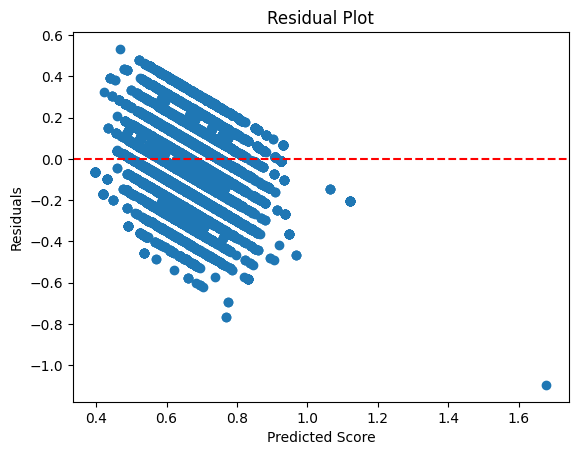

In [5]:
residuals = overall_score - predicted_score
plt.scatter(predicted_score, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


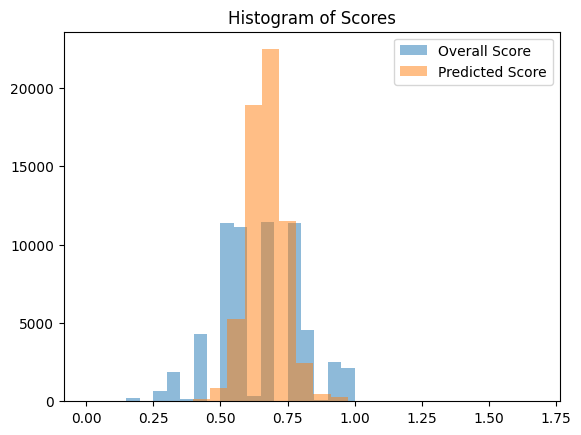

In [6]:
plt.hist(overall_score, bins=20, alpha=0.5, label='Overall Score')
plt.hist(predicted_score, bins=20, alpha=0.5, label='Predicted Score')
plt.legend(loc='upper right')
plt.title('Histogram of Scores')
plt.show()


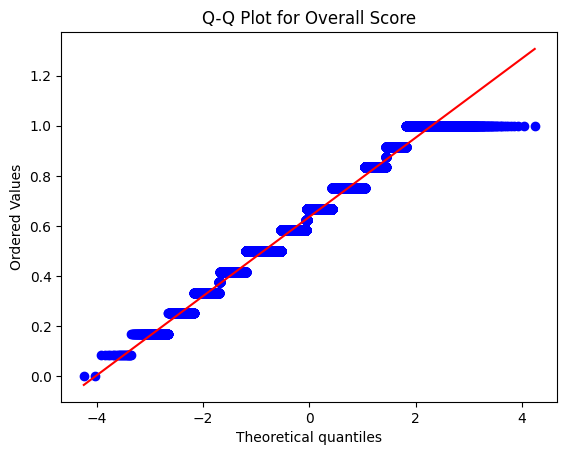

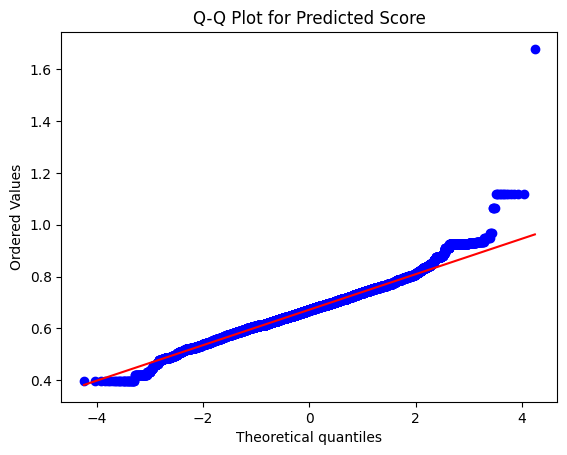

In [7]:
import scipy.stats as stats

stats.probplot(overall_score, dist="norm", plot=plt)
plt.title('Q-Q Plot for Overall Score')
plt.show()

stats.probplot(predicted_score, dist="norm", plot=plt)
plt.title('Q-Q Plot for Predicted Score')
plt.show()


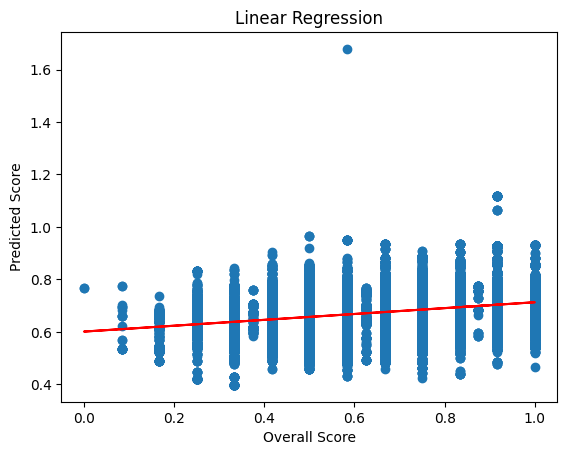

決定係数 R^2: 0.06795035358947421


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 線形回帰モデルの作成
model = LinearRegression()
X = np.array(overall_score).reshape(-1, 1)
y = np.array(predicted_score)
model.fit(X, y)

# 回帰直線をプロット
plt.scatter(overall_score, predicted_score)
plt.plot(overall_score, model.predict(X), color='red')
plt.xlabel('Overall Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression')
plt.show()

# 回帰モデルのスコア（決定係数R^2など）
r_squared = model.score(X, y)
print(f'決定係数 R^2: {r_squared}')
